In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import math
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
features = [f for f in iris_df.columns]
print('Features:', features)
iris_df = normalize(iris_df)
display(iris_df)

In [ ]:
def getCost(X, centres):
  k = len(centres)
  n = len(X)
  # print('cneters: ', centres)
  group_label = np.zeros((n))
  for i in range(n):
    # ith sample

    done = 0

    for j in range(k):
      if(i == centres[j]):
        group_label[i] = j
        done = 1

    if(done):
      continue

    dist = []

    for j in range(k):
      # jth cluster centre
      dist.append(math.sqrt(np.sum((X[i]-X[centres[j]])**2)))

    group_label[i] = dist.index(min(dist))
  
  return silhouette_score(X, group_label)

In [ ]:
def KmetiodsCluster(X, k, maxEpoch):
  n = len(X)
  centres = np.array(random.sample(range(n), k))
  print(centres)
  cost_list = []
  epoch_list = []
  ep = 0

  for _ in range(maxEpoch):
    ep += 1
    # for i in range(n):
    #   # ith sample
    #   dist = []
    #   for j in range(k):
    #     # jth cluster centre
    #     dist.append(math.sqrt(np.sum((X[i]-X[centre[j]])**2)))
    #   group_label[i] = dist.index(min(dist))

    # print(centres)
    # print(_group_label)

    cur_cost = getCost(X, centres)
    # print(cur_cost)

    _centres = np.copy(centres)

    # print('_centres = ', _centres)

    for i in range(k):
      # print('i: ', i)
      for j in range(n):
        # print('j: ', j)
        if(j == centres[i]):
          continue
        prev = centres[i]
        centres[i] = j
        new_cost = getCost(X, centres)
        # print('New cost: ', new_cost)
        if(new_cost <= cur_cost):
          centres[i] = prev
        # print(centres)
    
    # print('centres = ', centres)

    cur_cost = getCost(X, centres)
    cost_list.append(cur_cost)
    epoch_list.append(ep)

    if(np.array_equal(_centres, centres)):
      break

    # if(np.array_equal(_centres, centres)):
    #   break

  print('no of epochs: ', epoch_list[-1])
  print('sse list: ', cost_list)
  plt.plot(epoch_list, cost_list)
  plt.show()
  return cost_list[-1]

[130 114  61]
no of epochs:  18
sse list:  [0.27686983936718107, 0.38058989951186023, 0.3810819374395191, 0.41635047690605725, 0.4283582582290785, 0.44737916083591783, 0.44796735660397813, 0.4730527509432507, 0.5705127127465616, 0.5719409645589714, 0.5724835763194158, 0.573989239755684, 0.5758706068962987, 0.6207609747886613, 0.6224217359781568, 0.6265140826200186, 0.6940699649132857, 0.6940699649132857]


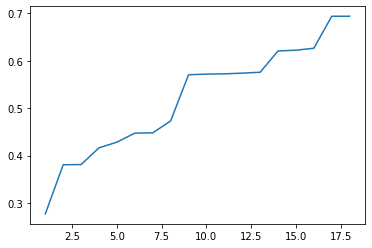

0.6940699649132857

In [ ]:
KmetiodsCluster(iris_df, 3, 100)